In [1]:
import pandas as pd

df=pd.read_csv(r"C:\Users\nehab\Downloads\archive\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [5]:
df.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
48782    False
48790    False
48799    False
48805    False
48852    False
Length: 38821, dtype: bool

In [6]:
df = df[df['price'] > 0]


In [7]:
df=df[df['minimum_nights']<30]


In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
categorical_cols=['neighbourhood_group','neighbourhood','room_type','host_name']
for col in categorical_cols:
    df[col]=df[col].astype('category')


In [10]:
df.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                         category
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_filtered=df[df['price']<1000]

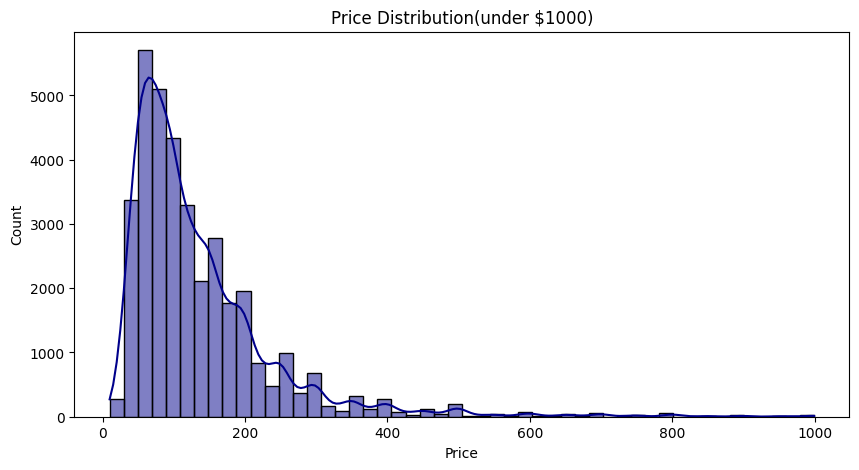

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['price'],bins=50,kde=True,color='darkblue')
plt.title('Price Distribution(under $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

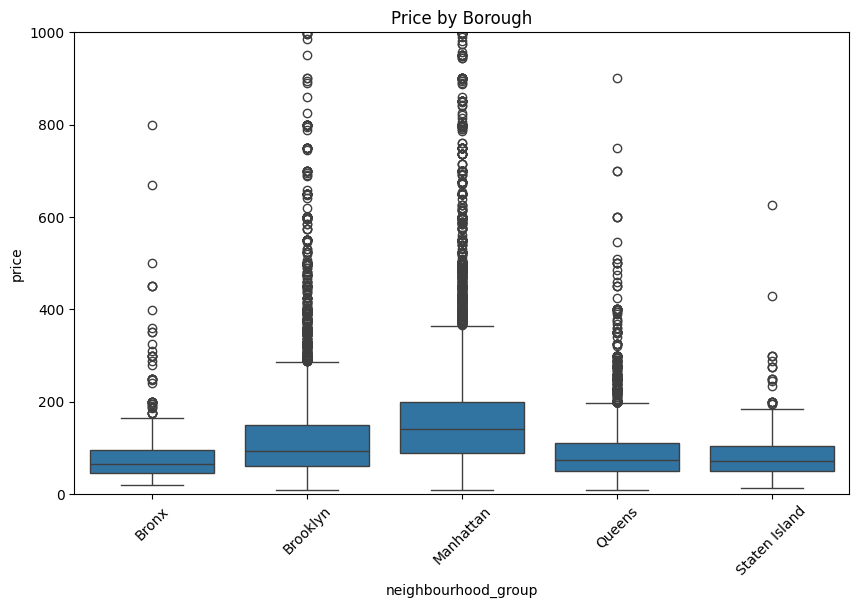

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='neighbourhood_group', y='price')
plt.ylim(0, 1000)
plt.title('Price by Borough')
plt.xticks(rotation=45)
plt.show()


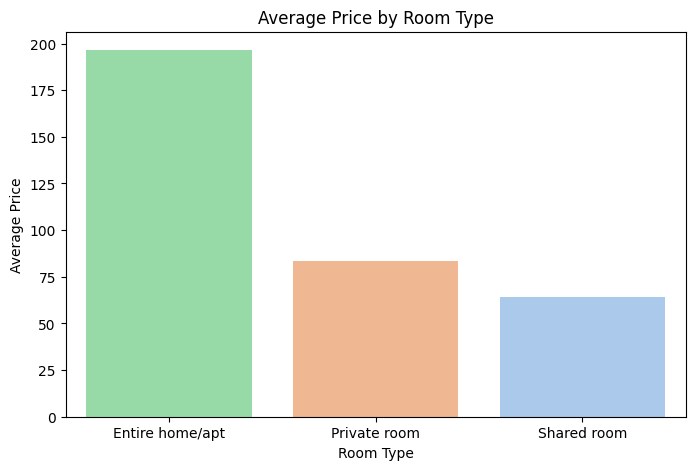

In [15]:
room_price = df.groupby('room_type',observed=True)['price'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=room_price.index, y=room_price.values,hue=room_price, palette='pastel',legend=False)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()


In [16]:
availability_bins = pd.cut(df['availability_365'],
                           bins=[-1, 0, 90, 180, 365],
                           labels=['0 (Not Available)', '1–90', '91–180', '181–365'])


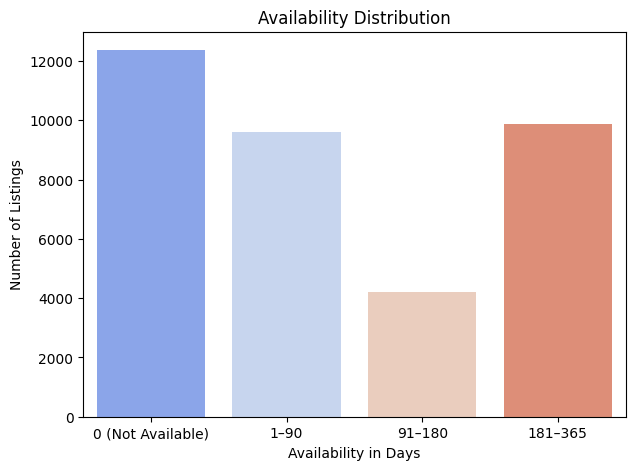

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x=availability_bins,hue=availability_bins, palette='coolwarm',legend=False)
plt.title('Availability Distribution')
plt.xlabel('Availability in Days')
plt.ylabel('Number of Listings')
plt.show()


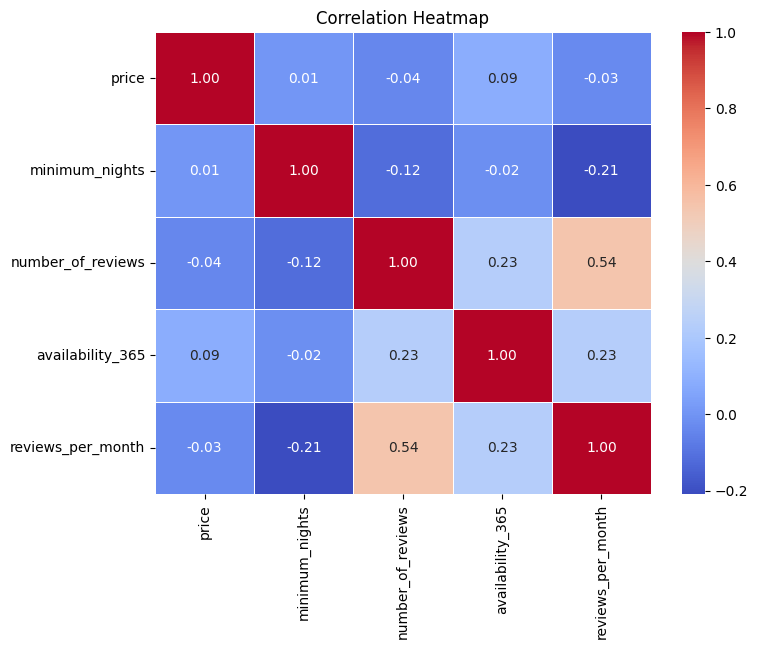

In [18]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'reviews_per_month']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


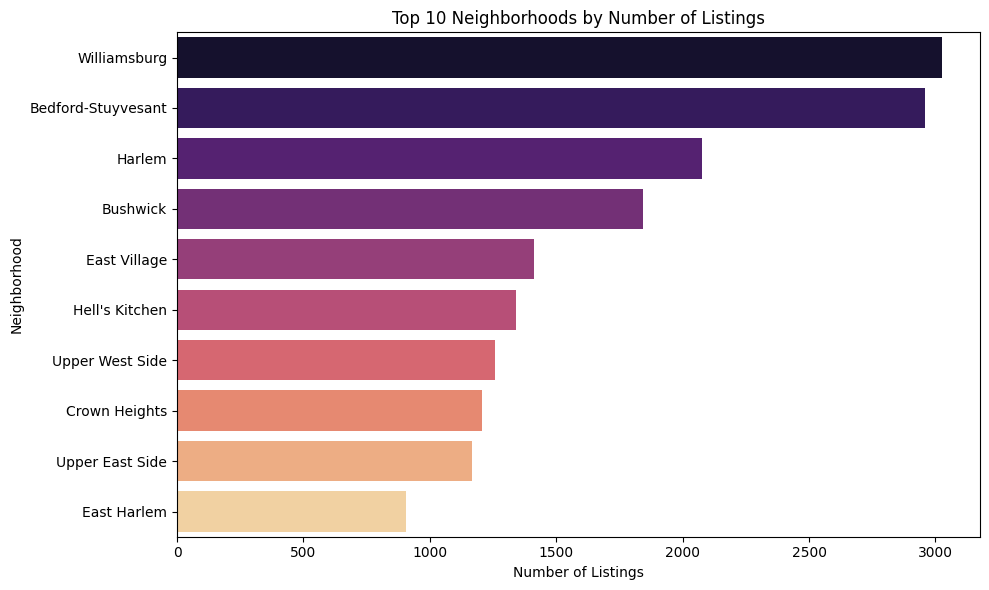

In [23]:
# Convert to normal Index — drop category memory!
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)
top_neighbourhoods.index = top_neighbourhoods.index.astype(str)  

# Now plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index,hue=top_neighbourhoods.index,palette='magma',legend=False)
plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()



    Key Insights & Conclusions — NYC Airbnb Market Analysis
    
 
 1. High-Demand Areas
Brooklyn and Manhattan are the most popular boroughs for Airbnb listings.

Top neighborhoods with the highest number of listings and reviews include Williamsburg, Bedford-Stuyvesant, and Harlem.

These areas indicate strong tourist interest and high host activity, making them competitive but promising markets.


 2. Optimal Pricing Patterns
Entire homes/apartments in Manhattan have the highest average prices, often exceeding $200/night.

Private rooms are most budget-friendly, especially in Queens and Bronx (~$60–$90 range).

Listings priced at $100–$200 in central areas like Brooklyn offer a balance of demand and affordability.


 3. Availability & Seasonal Trends
Listings with high availability (200+ days) are most common in Manhattan and Brooklyn.

Some listings show availability_365 = 0, indicating inactive or seasonal hosts — useful for filtering during analysis.


 4. Recommendations for New Hosts
Emerging neighborhoods like Crown Heights and East Harlem show decent demand with relatively fewer listings, ideal for new hosts.

Offering private rooms with flexible minimum nights increases visibility and booking potential for new listings


 5. Budget-Friendly Zones for Tourists
Best-value areas under $100/night: Bushwick, Harlem, Crown Heights.

Tourists can save significantly by booking private/shared rooms in these neighborhoods while staying near tourist hotspots.


    Conclusion
The NYC Airbnb market is vibrant but competitive. Understanding pricing dynamics, neighborhood trends, and guest behavior is key to standing out. Hosts can optimize performance by setting strategic prices, targeting high-demand but less saturated areas, and offering flexible, budget-friendly options.